<a href="https://colab.research.google.com/github/polevev/kaggle/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0__hw_1_game_of_thrones_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

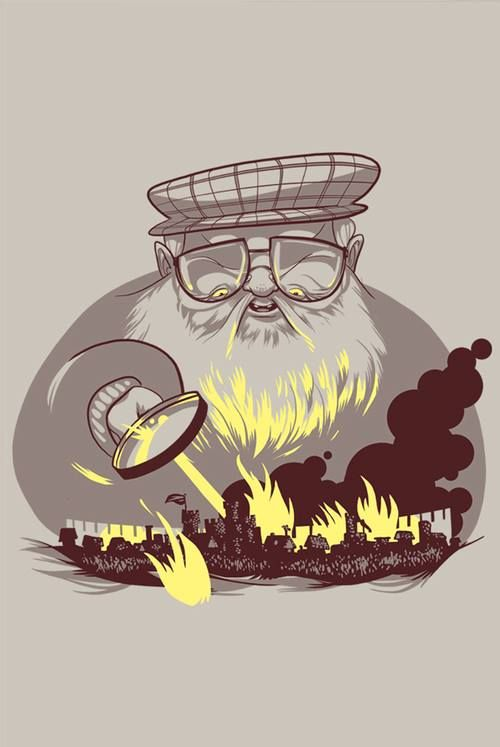

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 64.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 63.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
df = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')

In [ ]:
df.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
df.isna().sum()

,0
name,0
title,840
male,0
culture,1069
house,381
book1,0
book2,0
book3,0
book4,0
book5,0


Удалим столбцы с именами

In [ ]:
df.drop(columns='dateOfBirth', inplace=True)

In [ ]:
df.drop(columns=['mother','father','heir','spouse'], inplace=True)

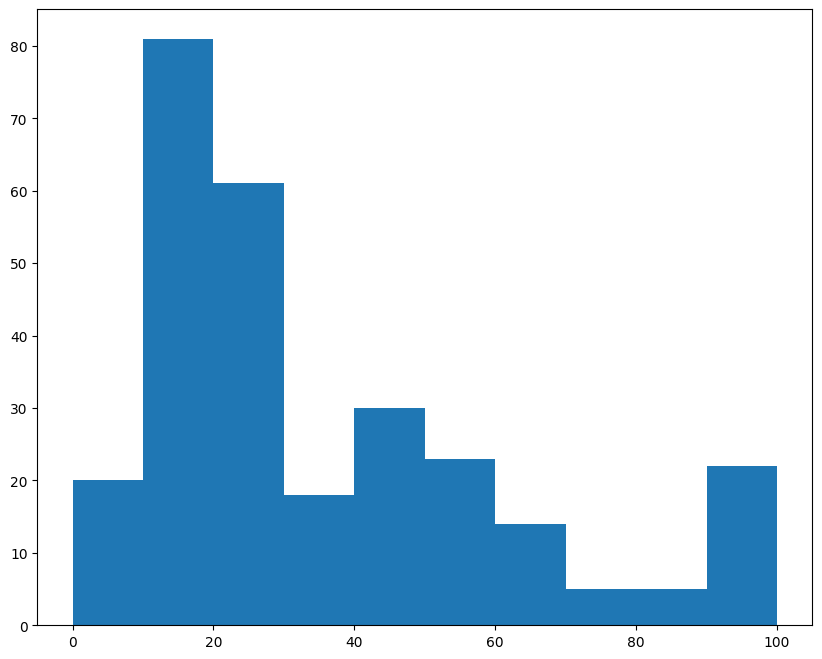

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df['age'])
plt.show()

In [ ]:
df.describe()

,male,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


Заполняем NaN в возрасте медианой

In [ ]:
import numpy as np
df['age'].fillna(np.quantile(df['age'].dropna().values,q=0.5), inplace = True)

<ipython-input-32-dd98971ea342>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(np.quantile(df['age'].dropna().values,q=0.5), inplace = True)


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


Признак isPopular

In [ ]:
df['isPopular'] = df['popularity'].apply(lambda x: 0 if x < 0.5 else 1)
df['isPopular'].value_counts()

,count
isPopular,
0,1530
1,27


Признак boolDeadRelations

In [ ]:
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 0 if x == 0 else 1)
df['boolDeadRelations'].value_counts()

,count
boolDeadRelations,
0,1488
1,69


Признак culture

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
df['culture'] = df['culture'].replace(['summer islands', 'summer islander', 'summer isles'],'Summer Islands')
df['culture'] = df['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'], 'Ghiscari')
df['culture'] = df['culture'].replace(["asshai'i", 'asshai'], 'Asshai')
df['culture'] = df['culture'].replace(['lysene', 'lyseni'], 'Lysene')
df['culture'] = df['culture'].replace(['andal', 'andals'], 'Andal')
df['culture'] = df['culture'].replace(['braavosi', 'braavos'], 'Braavosi')
df['culture'] = df['culture'].replace(['dornishmen', 'dorne', 'dornish'], 'Dornish')
df['culture'] = df['culture'].replace(['myr', 'myrish', 'myrmen'])
df['culture'] = df['culture'].replace(['westermen', 'westerman', 'westerlands'], 'Westermen')
df['culture'] = df['culture'].replace(['westeros', 'westerosi'], 'Westerosi')
df['culture'] = df['culture'].replace(['stormlands', 'stormlander'], 'Stormlander')
df['culture'] = df['culture'].replace(['norvos', 'norvoshi'], 'Norvoshi')
df['culture'] = df['culture'].replace(['the north', 'northmen'], 'Northmen')
df['culture'] = df['culture'].replace(['wildling', 'first men', 'free folk'], 'Free Folk')
df['culture'] = df['culture'].replace(['qartheen', 'qarth'], 'Qartheen')
df['culture'] = df['culture'].replace(['the reach', 'reach', 'reachmen'], 'Reach')

<ipython-input-77-12428ec06b4b>:8: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['culture'] = df['culture'].replace(['myr', 'myrish', 'myrmen'])


Дропаем старые колонки

In [ ]:
df.drop(columns = ['popularity', 'numDeadRelations'], inplace = True)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
#Удалим признаки, почти полностью из NaN и вряд ли влияющие на предсказание
df.drop(columns = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'name'], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

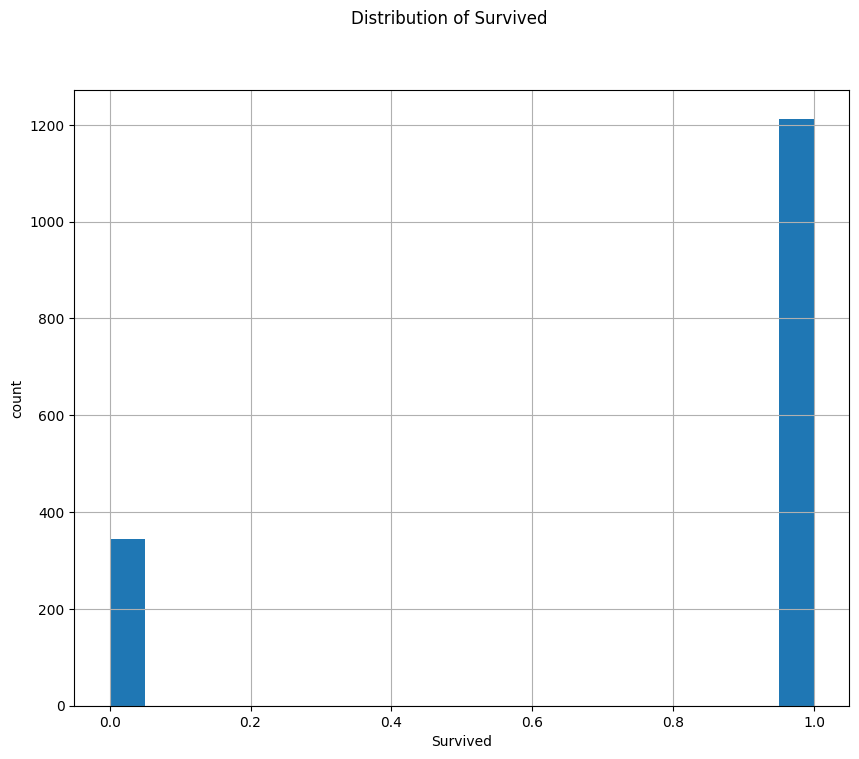

In [ ]:
#Целевая переменная категориальная, сильного перекоса нет.
plt.figure(figsize=(10,8))

df['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
df.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,24.0,0,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,24.0,1,0,0
4,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,0


In [ ]:
#Количественных признаков впрочем не осталось, только возраст.
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isAlive', 'isPopular', 'boolDeadRelations']
categorical_features = df[categorical_columns]
categorical_features

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,1,1
3,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,1,0,0
4,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,0,0,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,NaN,NaN,1,0,1,1,0,0,1,1,0,0
1554,NaN,0,NaN,NaN,1,1,0,0,0,0,0,0,0,0
1555,NaN,1,NaN,House Seaworth,0,1,1,1,1,0,0,0,0,0


In [ ]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture', 'house']

Лучше будет использовать Label Encoder, так как в каждом из этих столбцов много уникальных значений.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  df[column] = label_encoding.fit_transform(df[column])

In [ ]:
df.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,195,1,48,315,0,0,0,0,0,0,0,24.0,0,1,1
2,115,1,31,106,1,1,1,1,1,1,1,97.0,1,1,1
3,163,1,48,244,0,0,0,1,0,0,1,24.0,1,0,0
4,145,0,48,21,0,0,0,0,0,1,1,23.0,0,0,0
5,53,0,7,219,0,0,0,1,0,1,1,29.0,1,0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

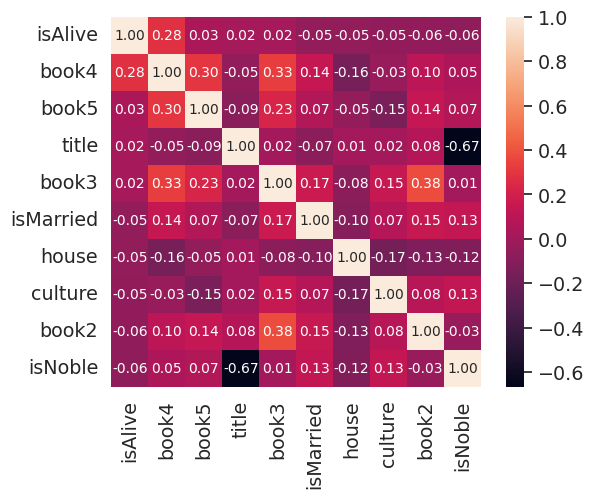

In [ ]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Похоже что к концу выпуска книг выживание увеличивается...

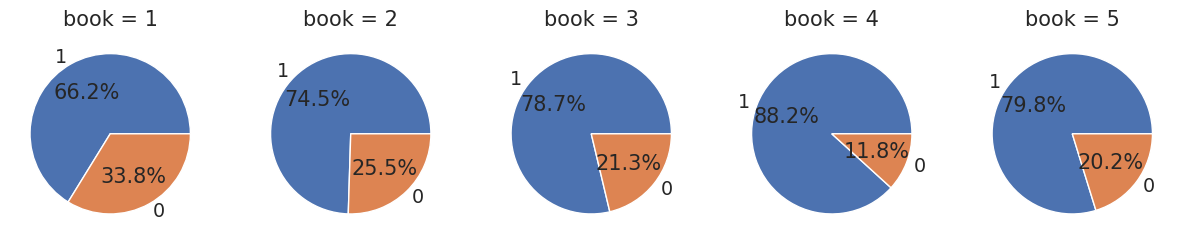

In [ ]:
data1 = df[df['book1'] == 1]['isAlive'].value_counts()
data2 = df[df['book2'] == 1]['isAlive'].value_counts()
data3 = df[df['book3'] == 1]['isAlive'].value_counts()
data4 = df[df['book4'] == 1]['isAlive'].value_counts()
data5 = df[df['book5'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,10))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')

ax1.set_title("book = 1")
ax2.set_title("book = 2")
ax3.set_title("book = 3")
ax4.set_title("book = 4")
ax5.set_title("book = 5")

plt.show()

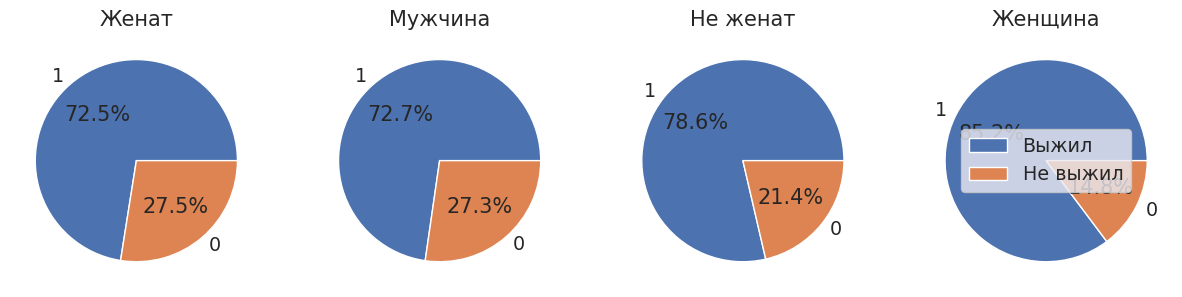

In [ ]:
data_mar = df[df['isMarried'] == 1]['isAlive'].value_counts()
data_sex = df[df['male'] == 1]['isAlive'].value_counts()
data_mar_1 = df[df['isMarried'] == 0]['isAlive'].value_counts()
data_sex_1 = df[df['male'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,10))
ax1.pie(data_mar.values, labels=data_mar.index, autopct='%1.1f%%')
ax2.pie(data_sex.values, labels=data_sex.index, autopct='%1.1f%%')
ax3.pie(data_mar_1.values, labels=data_mar_1.index, autopct='%1.1f%%')
ax4.pie(data_sex_1.values, labels=data_sex_1.index, autopct='%1.1f%%')

ax1.set_title("Женат")
ax2.set_title("Мужчина")
ax3.set_title("Не женат")
ax4.set_title("Женщина")


plt.legend(['Выжил', 'Не выжил'])

plt.show()

Женщины выживали несколько больше, как и не женатые?

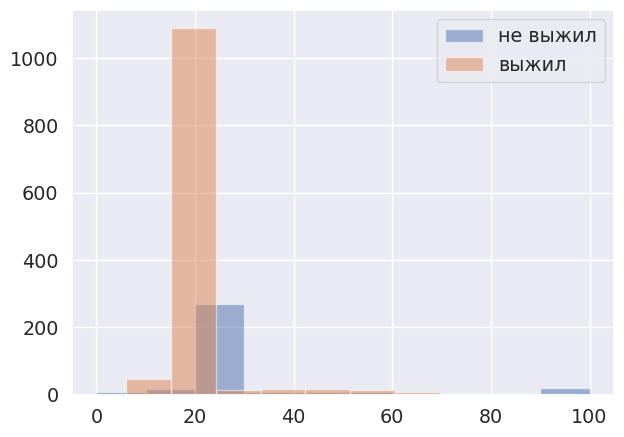

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(df['age'][df['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(df['age'][df['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

Есть отклонение по возрасту выживания

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = df.drop(columns = ['isAlive'])
y = df['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape)

(1245, 14) (312, 14)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_log = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

In [ ]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_forest = rand_forest.predict(X_test)

In [ ]:
gaus = GaussianProcessClassifier()
gaus.fit(X_train, y_train)
y_pred_gaus = gaus.predict(X_test)

In [ ]:
gaus_nb = GaussianNB()
gaus_nb.fit(X_train, y_train)
y_pred_gausnb = gaus_nb.predict(X_test)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


In [ ]:
y_pred_forest = rand_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


In [ ]:
y_pred_gaus = gaus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gaus)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7724


In [ ]:
y_pred_gausnb = gaus_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gausnb)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


In [ ]:
y_pred_KNN = KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_KNN)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7724


In [ ]:
y_pred_svc = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7756


In [ ]:
y_pred_dtc = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7468


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.33MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [ ]:
test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [ ]:
test['age'].fillna(np.quantile(df['age'].dropna().values,q=0.5), inplace = True)

<ipython-input-157-752799c3341b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['age'].fillna(np.quantile(df['age'].dropna().values,q=0.5), inplace = True)


In [ ]:
test['isPopular'] = test['popularity'].apply(lambda x: 0 if x < 0.5 else 1)
test['isPopular'].value_counts()

,count
isPopular,
0,344
1,45


In [ ]:
test['boolDeadRelations'] = test['numDeadRelations'].apply(lambda x: 0 if x == 0 else 1)
test['boolDeadRelations'].value_counts()

,count
boolDeadRelations,
0,313
1,76


In [ ]:
test['culture'] = test['culture'].replace(['summer islands', 'summer islander', 'summer isles'],'Summer Islands')
test['culture'] = test['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'], 'Ghiscari')
test['culture'] = test['culture'].replace(["asshai'i", 'asshai'], 'Asshai')
test['culture'] = test['culture'].replace(['lysene', 'lyseni'], 'Lysene')
test['culture'] = test['culture'].replace(['andal', 'andals'], 'Andal')
test['culture'] = test['culture'].replace(['braavosi', 'braavos'], 'Braavosi')
test['culture'] = test['culture'].replace(['dornishmen', 'dorne', 'dornish'], 'Dornish')
test['culture'] = test['culture'].replace(['myr', 'myrish', 'myrmen'])
test['culture'] = test['culture'].replace(['westermen', 'westerman', 'westerlands'], 'Westermen')
test['culture'] = test['culture'].replace(['westeros', 'westerosi'], 'Westerosi')
test['culture'] = test['culture'].replace(['stormlands', 'stormlander'], 'Stormlander')
test['culture'] = test['culture'].replace(['norvos', 'norvoshi'], 'Norvoshi')
test['culture'] = test['culture'].replace(['the north', 'northmen'], 'Northmen')
test['culture'] = test['culture'].replace(['wildling', 'first men', 'free folk'], 'Free Folk')
test['culture'] = test['culture'].replace(['qartheen', 'qarth'], 'Qartheen')
test['culture'] = test['culture'].replace(['the reach', 'reach', 'reachmen'], 'Reach')

<ipython-input-160-69ef38d4ddce>:8: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  test['culture'] = test['culture'].replace(['myr', 'myrish', 'myrmen'])


In [ ]:
for column in unprocessed_cat_features:
  test[column] = label_encoding.fit_transform(test[column])

In [ ]:
test.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

In [ ]:
X.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'age', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

Просто заменим колонками из трейн, так как они должны быть одинаковы

In [ ]:
test = test[X.columns]

In [ ]:
test

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1558,109,0,48,22,0,0,0,0,1,0,0,100.0,0,0
1559,109,0,0,128,0,1,1,1,1,0,0,24.0,1,0
1560,109,0,48,6,0,0,1,1,0,0,0,24.0,0,0
1561,94,1,48,106,1,1,1,1,1,0,1,24.0,0,0
1562,109,1,32,50,1,1,1,1,1,1,0,38.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,109,1,45,95,1,1,1,1,1,0,0,24.0,0,0
1943,109,1,48,23,0,1,0,1,1,0,0,24.0,0,0
1944,109,1,48,137,1,1,1,1,1,0,0,24.0,0,0


In [ ]:
y_pred_forest = rand_forest.predict(test)

In [ ]:
submission['isAlive'] = y_pred_forest

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,0
1562,1
...,...
1942,1
1943,1
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)